In [1]:
import numpy as np

class Perceptron:
    
    def __init__(self, n_iters = 100, learning_rate = 0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return 1 if x > 0 else 0
    
    def fit(self,X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias 
                y_hat = self.step_function(linear_output)
                self.weights += x_i*self.lr*(y[idx] - y_hat)
                self.bias += self.lr * (y[idx] - y_hat)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)
    def get_weights(self):
        return self.weights
    def get_bias(self):
        return self.bias
    def get_score(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return linear_output

In [2]:
import numpy as np

class Regularized_Perceptron:
    
    def __init__(self, n_iters=100, learning_rate=0.05, l2_penalty=0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.l2_penalty = l2_penalty  # Add regularization penalty

    def step_function(self, x):
        return 1 if x > 0 else 0
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_hat = self.step_function(linear_output)

                # Update rule with L2 regularization
                self.weights += self.lr * (x_i * (y[idx] - y_hat) - self.l2_penalty * self.weights)
                self.bias += self.lr * (y[idx] - y_hat)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)
    
    def get_weights(self):
        return self.weights
    
    def get_bias(self):
        return self.bias

    def get_score(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return linear_output

In [3]:
def classify_four_classes_perceptron(scores):
    return np.argmax(scores, axis=1)

In [4]:
import pandas as pd

df_train = pd.read_csv(r"C:\Users\franc\Documents\rna_2\embeddings_train.csv")
df_test = pd.read_csv(r"C:\Users\franc\Documents\rna_2\embeddings_test.csv")


In [5]:
df_train = df_train[(df_train['label'] == 0) | (df_train['label'] == 3)| (df_train['label'] == 4)| (df_train['label'] == 5)]
df_test = df_test[(df_test['label'] == 0) | (df_test['label'] == 3)| (df_test['label'] == 4)| (df_test['label'] == 5)]
X_test = df_test.drop('label', axis = 1)
X_train = df_train.drop('label', axis = 1)
y_test = df_test['label']
y_train = df_train['label']

In [6]:
from sklearn.manifold import TSNE

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
tsne = TSNE(n_components=2, random_state=42)
X_tsne_combined = tsne.fit_transform(X_combined)

C:\Users\franc\AppData\Local\Temp\ipykernel_17864\1058864568.py:9: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Classe', palette='viridis', style='Classe', markers=['o', 's'], alpha=0.7)


<Axes: xlabel='Component 1', ylabel='Component 2'>

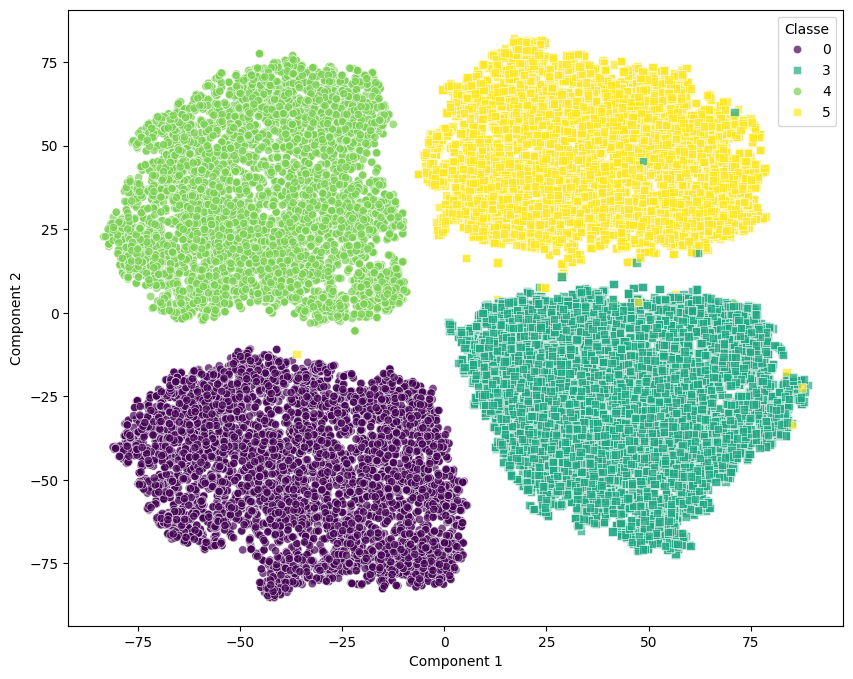

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

tsne_df = pd.DataFrame(X_tsne_combined, columns=['Component 1', 'Component 2'])
tsne_df['Classe'] = y_combined  # Add the class labels to the DataFrame

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Classe', palette='viridis', style='Classe', markers=['o', 's'], alpha=0.7)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tsne_combined, y_combined, test_size=0.5, random_state=101)

In [9]:
#one if zero, zero otherwise
y_train_0 = np.copy(y_train)
y_train_0[y_train_0 == 0] = 1
y_train_0[y_train_0 != 1] = 0

y_test_0 = np.copy(y_test)
y_test_0[y_test_0 == 0] = 1
y_test_0[y_test_0 != 1] = 0

In [10]:
#one if three, zero otherwise
y_train_3 = np.copy(y_train)
y_train_3[y_train_3 == 3] = 1
y_train_3[y_train_3 != 1] = 0

y_test_3 = np.copy(y_test)
y_test_3[y_test_3 == 3] = 1
y_test_3[y_test_3 != 1] = 0

In [11]:
#one if four, zero otherwise
y_train_4 = np.copy(y_train)
y_train_4[y_train_4 == 4] = 1
y_train_4[y_train_4 != 1] = 0

y_test_4 = np.copy(y_test)
y_test_4[y_test_4 == 4] = 1
y_test_4[y_test_4 != 1] = 0

In [12]:
#one if five, zero otherwise
y_train_5 = np.copy(y_train)
y_train_5[y_train_5 == 5] = 1
y_train_5[y_train_5 != 1] = 0

y_test_5 = np.copy(y_test)
y_test_5[y_test_5 == 5] = 1
y_test_5[y_test_5 != 1] = 0

In [13]:
perceptron_0 = Perceptron()
perceptron_0.fit(X_train, y_train_0)

perceptron_3 = Perceptron()
perceptron_3.fit(X_train, y_train_3)

perceptron_4 = Perceptron()
perceptron_4.fit(X_train, y_train_4)

perceptron_5 = Perceptron()
perceptron_5.fit(X_train, y_train_5)


In [14]:
y0_score = [perceptron_0.get_score(x) for x in X_test]
y3_score = [perceptron_3.get_score(x) for x in X_test]
y4_score = [perceptron_4.get_score(x) for x in X_test]
y5_score = [perceptron_5.get_score(x) for x in X_test]

In [15]:
y_score = np.column_stack((y0_score, y3_score, y4_score, y5_score))

In [16]:
y_pred = classify_four_classes_perceptron(y_score)

In [17]:
y_pred[y_pred != 0] +=2

In [18]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 96.57%


C:\Users\franc\AppData\Local\Temp\ipykernel_17864\2399653819.py:9: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Class', palette='viridis', style='Class', markers=['o', 's'], alpha=0.7)


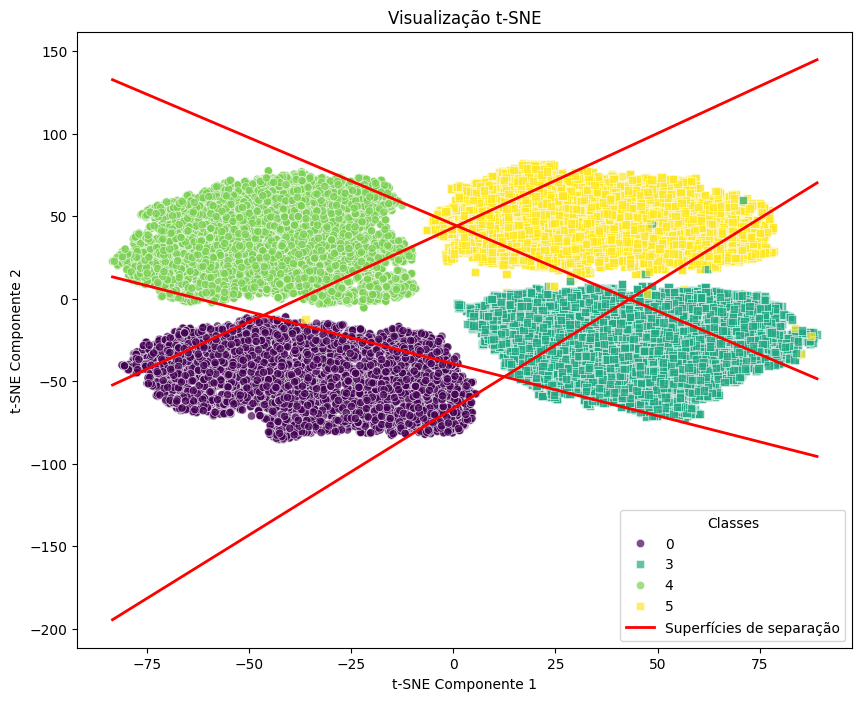

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

tsne_df = pd.DataFrame(X_tsne_combined, columns=['Component 1', 'Component 2'])
tsne_df['Class'] = y_combined  # Add the class labels to the DataFrame

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Class', palette='viridis', style='Class', markers=['o', 's'], alpha=0.7)

slope_0 = -1*perceptron_0.get_weights()[0]/perceptron_0.get_weights()[1]
intercept_0 = -1 * perceptron_0.get_bias()/perceptron_0.get_weights()[1]

x_values = np.linspace(tsne_df['Component 1'].min(), tsne_df['Component 1'].max(), 100)
y_values_0 = slope_0 * x_values + intercept_0  # Calculate corresponding y values

slope_3 = -1*perceptron_3.get_weights()[0]/perceptron_3.get_weights()[1]
intercept_3 = -1 * perceptron_3.get_bias()/perceptron_3.get_weights()[1]

y_values_3 = slope_3 * x_values + intercept_3  # Calculate corresponding y values

slope_4 = -1*perceptron_4.get_weights()[0]/perceptron_4.get_weights()[1]
intercept_4 = -1 * perceptron_4.get_bias()/perceptron_4.get_weights()[1]

y_values_4 = slope_4 * x_values + intercept_4  # Calculate corresponding y values

slope_5 = -1*perceptron_5.get_weights()[0]/perceptron_5.get_weights()[1]
intercept_5 = -1 * perceptron_5.get_bias()/perceptron_5.get_weights()[1]

y_values_5 = slope_5 * x_values + intercept_5  # Calculate corresponding y values

# Plot the line
plt.plot(x_values, y_values_0, color='red', linestyle='-', linewidth=2, label='')
plt.plot(x_values, y_values_3, color='red', linestyle='-', linewidth=2, label='')
plt.plot(x_values, y_values_4, color='red', linestyle='-', linewidth=2, label='')
plt.plot(x_values, y_values_5, color='red', linestyle='-', linewidth=2, label='Superfícies de separação')
plt.title('Visualização t-SNE')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Classes')
plt.show()

In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3438
           3       1.00      0.91      0.95      3616
           4       0.97      1.00      0.98      3424
           5       0.90      0.96      0.93      3113

    accuracy                           0.97     13591
   macro avg       0.97      0.97      0.97     13591
weighted avg       0.97      0.97      0.97     13591



In [21]:
perceptron_0_r = Regularized_Perceptron()
perceptron_0_r.fit(X_train, y_train_0)

perceptron_3_r = Regularized_Perceptron()
perceptron_3_r.fit(X_train, y_train_3)

perceptron_4_r = Regularized_Perceptron()
perceptron_4_r.fit(X_train, y_train_4)

perceptron_5_r = Regularized_Perceptron()
perceptron_5_r.fit(X_train, y_train_5)


In [22]:
y0_score_r = [perceptron_0_r.get_score(x) for x in X_test]
y3_score_r = [perceptron_3_r.get_score(x) for x in X_test]
y4_score_r = [perceptron_4_r.get_score(x) for x in X_test]
y5_score_r = [perceptron_5_r.get_score(x) for x in X_test]

In [23]:
y_score_r = np.column_stack((y0_score_r, y3_score_r, y4_score_r, y5_score_r))

In [24]:
y_pred_r = classify_four_classes_perceptron(y_score_r)

In [25]:
y_pred_r[y_pred_r != 0] +=2

In [26]:
from sklearn.metrics import classification_report, accuracy_score

accuracy_r = accuracy_score(y_test, y_pred_r)
print(f"Test Accuracy: {accuracy_r * 100:.2f}%")

Test Accuracy: 97.78%


C:\Users\franc\AppData\Local\Temp\ipykernel_17864\3736895880.py:9: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Class', palette='viridis', style='Class', markers=['o', 's'], alpha=0.7)


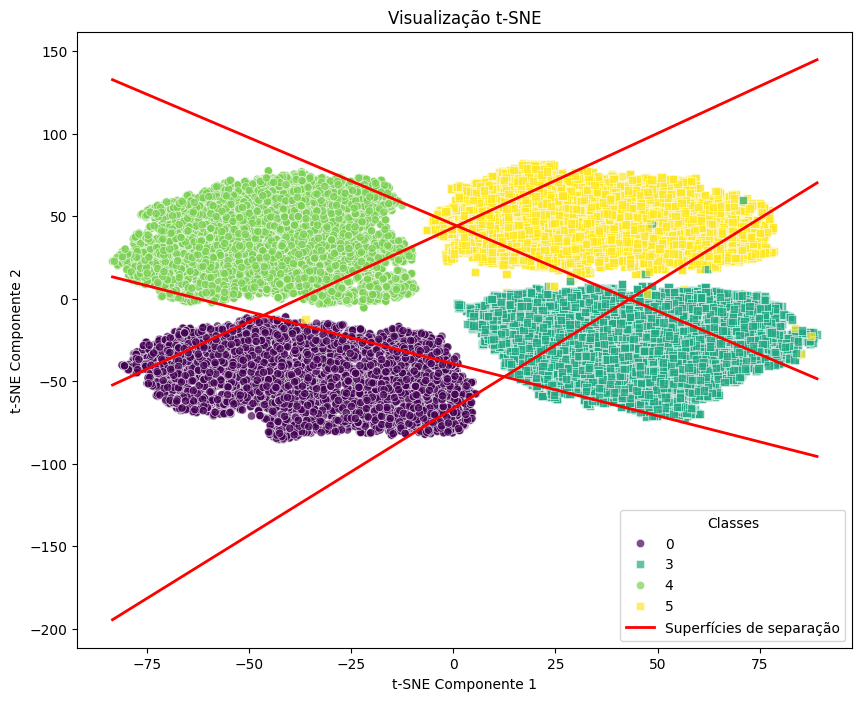

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

tsne_df = pd.DataFrame(X_tsne_combined, columns=['Component 1', 'Component 2'])
tsne_df['Class'] = y_combined  # Add the class labels to the DataFrame

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Class', palette='viridis', style='Class', markers=['o', 's'], alpha=0.7)

slope_0_r = -1*perceptron_0_r.get_weights()[0]/perceptron_0_r.get_weights()[1]
intercept_0_r = -1 * perceptron_0_r.get_bias()/perceptron_0_r.get_weights()[1]

x_values = np.linspace(tsne_df['Component 1'].min(), tsne_df['Component 1'].max(), 100)
y_values_0_r = slope_0_r * x_values + intercept_0_r  # Calculate corresponding y values

slope_3_r = -1*perceptron_3_r.get_weights()[0]/perceptron_3_r.get_weights()[1]
intercept_3_r = -1 * perceptron_3_r.get_bias()/perceptron_3_r.get_weights()[1]

y_values_3_r = slope_3_r * x_values + intercept_3_r  # Calculate corresponding y values

slope_4_r = -1*perceptron_4_r.get_weights()[0]/perceptron_4_r.get_weights()[1]
intercept_4_r = -1 * perceptron_4_r.get_bias()/perceptron_4_r.get_weights()[1]

y_values_4_r = slope_4_r * x_values + intercept_4_r  # Calculate corresponding y values

slope_5_r = -1*perceptron_5_r.get_weights()[0]/perceptron_5_r.get_weights()[1]
intercept_5_r = -1 * perceptron_5_r.get_bias()/perceptron_5_r.get_weights()[1]

y_values_5_r = slope_5_r * x_values + intercept_5_r  # Calculate corresponding y values

# Plot the line
plt.plot(x_values, y_values_0, color='red', linestyle='-', linewidth=2, label='')
plt.plot(x_values, y_values_3, color='red', linestyle='-', linewidth=2, label='')
plt.plot(x_values, y_values_4, color='red', linestyle='-', linewidth=2, label='')
plt.plot(x_values, y_values_5, color='red', linestyle='-', linewidth=2, label='Superfícies de separação')
plt.title('Visualização t-SNE')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Classes')
plt.show()